# Estudo Analítico do Desemprego, Analfabetismo e Escolarização do Brasil

## Descrição do Estudo

### Objetivo

Nesse trabalho, será conduzido um estudo em relação aos indíces de desemprego, analfabetismo e escolarização nas cinco diferentes regiões do Brasil. Além disso, a análise será realizada a partir de dados coletados pelo [**IBGE**](https://www.ibge.gov.br/) (**Instituto Brasileiro de Geografia e Estatística**).

O foco do estudo será desde o ano de 2016, no entanto, vale ressaltar que devido a pandemia de Covid 19, não há registros dos índices de escolarização e analfabetismo nos anos de 2020 e 2021.

Os principais pontos a serem discutidos serão:
- Comportamento do índice de desemprego.
- Comportamento do índice de analfabetismo em adultos.
- Comportamento do índice de escolarização em menores de idade.
- Relação entre índice de desemprego e índice de analfabetismo em adultos.
- Relação entre índice de analfabetismo em adultos e índice de escolarização em menores de idade.

### Fontes

**Analfabetismo**:
- **Fonte**: [IBGE PNADC](https://painel.ibge.gov.br/pnadc/).
- **Gráfico**: Taxa de analfabetismo das pessoas de 15 anos ou mais de idade.
- **Filtros**:
  - **Tema**: Educação.
  - **Recorte**: Grandes Regiões.
  - **Buscar**: Cada uma das cinco regiões do Brasil.

**Desemprego**:
- **Fonte**: [IBGE Estatísticas](https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=series-historicas).
- **Gráfico**: Taxa de desocupação, por idade, 1º trimestre 2012 - 1º trimestre 2024.
- **Filtros**:
  - **Nível Territorial**: Cada uma das cinco regiões do Brasil.

**Escolarização**:
- **Fonte**: [IBGE PNADC](https://painel.ibge.gov.br/pnadc/).
- **Gráfico**: Taxa de escolarização por grupo de idade.
- **Filtros**:
  - **Tema**: Educação.
  - **Recorte**: Grandes Regiões.
  - **Buscar**: Cada uma das cinco regiões do Brasil.

## Coleta e Tratamento dos Dados

Nessa etapa, será realizada a coleta e o tratamentos dos dados obtidos para o estudo.

Todos os dados foram baixados em formato .csv e armazenados na nuvem para que possam ser utilizados.

### Imports

Nesse trecho, será adicionado todos os imports necessários para a etapa de coleta e tratamento de dados

In [0]:
import pandas as pd
from io import StringIO
from typing import Dict, List

### Região

Nesse trecho, serão definidos os dados com todos os nomes das regiões do Brasil.

In [0]:
# Criação do dataframe de Região

data = [
    [1, "Centro Oeste"],
    [2, "Nordeste"],
    [3, "Norte"],
    [4, "Sudeste"],
    [5, "Sul"]
]
colunas = ["ID_Regiao", "Regiao"]
df_regiao = pd.DataFrame(data, columns=colunas)

print(df_regiao.head())

   ID_Regiao        Regiao
0          1  Centro Oeste
1          2      Nordeste
2          3         Norte
3          4       Sudeste
4          5           Sul


### Período

Nesse trecho, serão definidos os dados com os períodos de tempo utilizados no trabalho.

In [0]:
# Criação do dataframe de perído

ano_inicial = 2012
ano_final = 2024

data = []
index_id = 1
index_ano = ano_inicial

while index_ano <= ano_final:
  for i in range(1,5):
    data.append([
      index_id, i, index_ano
    ])

    index_id += 1
  
  index_ano += 1

colunas = ["ID_Periodo", "Trimestre", "Ano"]
df_periodo = pd.DataFrame(data, columns=colunas)

print(df_periodo)


    ID_Periodo  Trimestre   Ano
0            1          1  2012
1            2          2  2012
2            3          3  2012
3            4          4  2012
4            5          1  2013
5            6          2  2013
6            7          3  2013
7            8          4  2013
8            9          1  2014
9           10          2  2014
10          11          3  2014
11          12          4  2014
12          13          1  2015
13          14          2  2015
14          15          3  2015
15          16          4  2015
16          17          1  2016
17          18          2  2016
18          19          3  2016
19          20          4  2016
20          21          1  2017
21          22          2  2017
22          23          3  2017
23          24          4  2017
24          25          1  2018
25          26          2  2018
26          27          3  2018
27          28          4  2018
28          29          1  2019
29          30          2  2019
30      

### Analfabetismo

Nesse trecho, serão obtidos e tratados os dados de analfabetismo para pessoas de 15 anos ou mais em cada uma das cinco regiões do Brasil.

Vale ressaltar que como os dados aqui são analisados por ano e não por trimeste, será considerado que o resultado do ano será sempre o do último trimeste, ou seja, o quarto trimestre do ano.

In [0]:
# Criação de Dataframes por Região

def criar_df_do_csv(caminho: str):
    """
    Metodo para criar um dataframe
    """
    conteudo = dbutils.fs.head(caminho)
    csv = StringIO(conteudo)
    df = pd.read_csv(csv, delimiter=",", skiprows=1)

    return df

def obter_id_regiao(regiao: str) -> int:
    """
    Metodo responsavel por obter o id da regiao
    com base no dataframe de regiao criado
    """
    df = df_regiao[df_regiao['Regiao'] == regiao]
    id_regiao = int(df["ID_Regiao"])

    return id_regiao

def obter_id_periodo(ano: int) -> int:
    """
    Metodo responsavel por obter o id do periodo
    do ultimo trimestre.
    """
    df = df_periodo[
        (df_periodo['Ano'] == ano)
        &
        (df_periodo['Trimestre'] == 4)
    ]
    id_periodo = int(df["ID_Periodo"])

    return id_periodo

def criar_nova_coluna_fixa(df: pd.DataFrame, coluna: str, valor: int) -> None:
    """
    Metodo responsável por criar nova coluna.
    """
    df[coluna] = valor

def criar_coluna_periodo(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna periodo
    """
    df['ID_Periodo'] = df['Data '].apply(
        lambda ano: obter_id_periodo(ano)
    )

def renomear_colunas(df: pd.DataFrame, colunas: Dict) -> pd.DataFrame:
    """
    Metodo responsável por renomear as colunas
    do datraframe.
    """
    return df.rename(columns=colunas)

def filtrar_dataframe(df: pd.DataFrame, colunas_filtrar: List[str]) -> pd.DataFrame:
    """
    Função responsável por filtrar as colunas desejadas do DataFrame.
    Retorna um novo DataFrame contendo apenas as colunas especificadas.
    Além disso, remover os dados nulos de taxa de Analfabetismo.
    """
    return df[colunas_filtrar].dropna(subset=['Taxa_Analfabetismo'])

def _gerar_df_analfabetismo(caminho: str, regiao: str):
    """
    Metodo responsável por gerar o dataframe de analfabetismo
    """
    df = criar_df_do_csv(caminho)
    id_regiao = obter_id_regiao(regiao)

    criar_nova_coluna_fixa(df, "ID_Regiao", id_regiao)
    criar_coluna_periodo(df)

    colunas_renomear = {
        "Taxa de analfabetismo das pessoas de 15 anos ou mais de idade ": "Taxa_Analfabetismo"
    }
    df = renomear_colunas(df, colunas_renomear)

    colunas_filtrar = [
        "Taxa_Analfabetismo",
        "Unidade",
        "ID_Regiao",
        "ID_Periodo"
    ]
    df = filtrar_dataframe(df, colunas_filtrar)

    return df

# Centro Oeste
caminho_centro_oeste = "/FileStore/tables/Analfabetismo_Centro_Oeste.csv"
df_centro_oeste = _gerar_df_analfabetismo(caminho_centro_oeste, "Centro Oeste")

# Nordeste
caminho_nordeste = "/FileStore/tables/Analfabetismo_Nordeste.csv"
df_nordeste = _gerar_df_analfabetismo(caminho_nordeste, "Nordeste")

# Norte
caminho_norte = "/FileStore/tables/Analfabetismo_Norte.csv"
df_norte = _gerar_df_analfabetismo(caminho_norte, "Norte")

# Sudeste
caminho_sudeste = "/FileStore/tables/Analfabetismo_Sudeste.csv"
df_sudeste = _gerar_df_analfabetismo(caminho_sudeste, "Sudeste")

# Sul
caminho_sul = "/FileStore/tables/Analfabetismo_Sul.csv"
df_sul = _gerar_df_analfabetismo(caminho_sul, "Sul")

In [0]:
# Criação de Dataframe Final de Analfabetismo

def criar_coluna_id_analfabetismo(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna id
    """
    df['ID_Analfabetismo'] = df.reset_index().index + 1

def combinar_dataframe(dfs: List) -> pd.DataFrame:
    """
    Metodo para combinar dataframes
    """
    df_combinado = pd.concat(dfs, ignore_index=True)

    return df_combinado

df_analfabetismo = combinar_dataframe([
    df_centro_oeste,
    df_nordeste,
    df_norte,
    df_sudeste,
    df_sul
])
criar_coluna_id_analfabetismo(df_analfabetismo)

colunas_filtrar = [
    "ID_Analfabetismo",
    "Taxa_Analfabetismo",
    "Unidade",
    "ID_Regiao",
    "ID_Periodo"
]
df_analfabetismo = filtrar_dataframe(df_analfabetismo, colunas_filtrar)

print(df_analfabetismo)

    ID_Analfabetismo  Taxa_Analfabetismo Unidade  ID_Regiao  ID_Periodo
0                  1                 5.2       %          1          20
1                  2                 4.8       %          1          24
2                  3                 4.9       %          1          28
3                  4                 4.4       %          1          32
4                  5                 4.0       %          1          44
5                  6                 3.7       %          1          48
6                  7                13.9       %          2          20
7                  8                13.7       %          2          24
8                  9                13.0       %          2          28
9                 10                12.9       %          2          32
10                11                11.7       %          2          44
11                12                11.2       %          2          48
12                13                 7.9       %          3     

### Desemprego

Nesse trecho, serão obtidos e tratados os dados de desemprego em cada uma das cinco regiões do Brasil.

In [0]:
# Criação de Dataframe de Desemprego

def criar_df_do_csv(caminho: str) -> pd.DataFrame:
    """
    Metodo para criar um dataframe
    """
    conteudo = dbutils.fs.head(caminho)
    csv = StringIO(conteudo)

    df = pd.read_csv(csv, delimiter=";", skiprows=1, nrows=5)
    df.drop(columns=[' '], inplace=True)

    df_ajustado = df.melt(id_vars=["Grupo de idade"], var_name="Trimestre", value_name="Taxa_Desemprego")
    df_final = df_ajustado.rename(columns={"Grupo de idade": "Grupo_de_Idade"})
    df_final = df_final[['Taxa_Desemprego', 'Grupo_de_Idade', 'Trimestre']]

    return df_final

def obter_id_periodo(ano: int, trimestre: int) -> int:
    """
    Metodo responsavel por obter o id do periodo
    do ultimo trimestre.
    """
    df = df_periodo[
        (df_periodo['Ano'] == ano)
        &
        (df_periodo['Trimestre'] == trimestre)
    ]
    id_periodo = int(df["ID_Periodo"])

    return id_periodo

def criar_coluna_periodo(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna periodo
    """
    df['ID_Periodo'] = df['Trimestre'].apply(
        lambda tri_text: obter_id_periodo(
            int(tri_text[13:]),
            int(tri_text[0])
        )
    )

def criar_nova_coluna_fixa(df: pd.DataFrame, coluna: str, valor: int) -> None:
    """
    Metodo responsável por criar nova coluna.
    """
    df[coluna] = valor

def obter_id_regiao(regiao: str) -> int:
    """
    Metodo responsavel por obter o id da regiao
    com base no dataframe de regiao criado
    """
    df = df_regiao[df_regiao['Regiao'] == regiao]
    id_regiao = int(df["ID_Regiao"])

    return id_regiao

def criar_dataframe_regiao(caminho: str, região: str) -> pd.DataFrame:
    """
    Metodo responsável por criar o dataframe para a região
    indicada.
    """
    df = criar_df_do_csv(caminho)
    id_regiao = obter_id_regiao(região)
    
    criar_coluna_periodo(df)
    criar_nova_coluna_fixa(df, "ID_Regiao", id_regiao)

    return df

# Centro Oeste
caminho_centro_oeste = "/FileStore/tables/Desemprego_Centro_Oeste.csv"
df_centro_oeste = criar_dataframe_regiao(caminho_centro_oeste, "Centro Oeste")

# Nordeste
caminho_nordeste = "/FileStore/tables/Desemprego_Nordeste.csv"
df_nordeste = criar_dataframe_regiao(caminho_nordeste, "Nordeste")

# Norte
caminho_norte = "/FileStore/tables/Desemprego_Norte.csv"
df_norte = criar_dataframe_regiao(caminho_norte, "Norte")

# Sudeste
caminho_sudeste = "/FileStore/tables/Desemprego_Sudeste.csv"
df_sudeste = criar_dataframe_regiao(caminho_sudeste, "Sudeste")

# Sul
caminho_sul = "/FileStore/tables/Desemprego_Sul.csv"
df_sul = criar_dataframe_regiao(caminho_sul, "Sul")

In [0]:
def criar_coluna_id_desemprego(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna id
    """
    df['ID_Desemprego'] = df.reset_index().index + 1

def combinar_dataframe(dfs: List) -> pd.DataFrame:
    """
    Metodo para combinar dataframes
    """
    df_combinado = pd.concat(dfs, ignore_index=True)

    return df_combinado

df_desemprego = combinar_dataframe([
    df_centro_oeste,
    df_nordeste,
    df_norte,
    df_sudeste,
    df_sul
])
criar_coluna_id_desemprego(df_desemprego)

df_desemprego = df_desemprego[[
    'ID_Desemprego',
    'Taxa_Desemprego',
    'Grupo_de_Idade',
    'ID_Periodo',
    'ID_Regiao'
    ]
]

print(df_desemprego)

      ID_Desemprego  Taxa_Desemprego   Grupo_de_Idade  ID_Periodo  ID_Regiao
0                 1             24.8     14 a 17 anos           1          1
1                 2             13.9     18 a 24 anos           1          1
2                 3              6.1     25 a 39 anos           1          1
3                 4              3.3     40 a 59 anos           1          1
4                 5              2.4  60 anos ou mais           1          1
...             ...              ...              ...         ...        ...
1220           1221             29.3     14 a 17 anos          49          5
1221           1222             10.1     18 a 24 anos          49          5
1222           1223              4.2     25 a 39 anos          49          5
1223           1224              2.9     40 a 59 anos          49          5
1224           1225              2.3  60 anos ou mais          49          5

[1225 rows x 5 columns]


### Escolarização

Nesse trecho, serão obtidos e tratados os dados de escolarização em cada uma das cinco regiões do Brasil.

Vale ressaltar que como os dados aqui são analisados por ano e não por trimeste, será considerado que o resultado do ano será sempre o do último trimeste, ou seja, o quarto trimestre do ano.

In [0]:
# Criação de Dataframes por Região

def criar_df_do_csv(caminho: str):
    """
    Metodo para criar um dataframe
    """
    conteudo = dbutils.fs.head(caminho)
    csv = StringIO(conteudo)
    df = pd.read_csv(csv, delimiter=",", skiprows=1, )

    df_treated = df.melt(id_vars=['Data ', 'Unidade'], 
                    value_vars=['De 0 a 3 anos', 'De 4 e 5 anos', 'De 6 a 14 anos', 'De 15 a 17 anos'], 
                    var_name='Grupo de Idade', 
                    value_name='Taxa_Escolarizacao')

    return df_treated

def obter_id_regiao(regiao: str) -> int:
    """
    Metodo responsavel por obter o id da regiao
    com base no dataframe de regiao criado
    """
    df = df_regiao[df_regiao['Regiao'] == regiao]
    id_regiao = int(df["ID_Regiao"])

    return id_regiao

def obter_id_periodo(ano: int) -> int:
    """
    Metodo responsavel por obter o id do periodo
    do ultimo trimestre.
    """
    df = df_periodo[
        (df_periodo['Ano'] == ano)
        &
        (df_periodo['Trimestre'] == 4)
    ]
    id_periodo = int(df["ID_Periodo"])

    return id_periodo

def criar_nova_coluna_fixa(df: pd.DataFrame, coluna: str, valor: int) -> None:
    """
    Metodo responsável por criar nova coluna.
    """
    df[coluna] = valor

def criar_coluna_periodo(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna periodo
    """
    df['ID_Periodo'] = df['Data '].apply(
        lambda ano: obter_id_periodo(ano)
    )

def renomear_colunas(df: pd.DataFrame, colunas: Dict) -> pd.DataFrame:
    """
    Metodo responsável por renomear as colunas
    do datraframe.
    """
    return df.rename(columns=colunas)

def filtrar_dataframe(df: pd.DataFrame, colunas_filtrar: List[str]) -> pd.DataFrame:
    """
    Função responsável por filtrar as colunas desejadas do DataFrame.
    Retorna um novo DataFrame contendo apenas as colunas especificadas.
    Além disso, remover os dados nulos de taxa de Escolarizacao.
    """
    return df[colunas_filtrar].dropna(subset=['Taxa_Escolarizacao'])

def tratar_grupo_idade(df: pd.DataFrame) -> None:
    """
    Metodo responsável por tratar o grupo de idade
    """
    df['Grupo_de_Idade'] = df['Grupo_de_Idade'].apply(
        lambda grupo: grupo[3:]
    )

def _gerar_df_escolarizao(caminho: str, regiao: str):
    """
    Metodo responsável por gerar o dataframe de escolarizacao
    """
    df = criar_df_do_csv(caminho)
    id_regiao = obter_id_regiao(regiao)

    criar_nova_coluna_fixa(df, "ID_Regiao", id_regiao)
    criar_coluna_periodo(df)

    colunas_renomear = {
        "Grupo de Idade": "Grupo_de_Idade"
    }
    df = renomear_colunas(df, colunas_renomear)

    tratar_grupo_idade(df)

    colunas_filtrar = [
        "Taxa_Escolarizacao",
        "Unidade",
        "Grupo_de_Idade",
        "ID_Regiao",
        "ID_Periodo"
    ]
    df = filtrar_dataframe(df, colunas_filtrar)

    return df

# Centro Oeste
caminho_centro_oeste = "/FileStore/tables/Escolarizacao_Centro_Oeste_Criancas.csv"
df_centro_oeste = _gerar_df_escolarizao(caminho_centro_oeste, "Centro Oeste")

# Nordeste
caminho_nordeste = "/FileStore/tables/Escolarizacao_Nordeste_Criancas.csv"
df_nordeste = _gerar_df_escolarizao(caminho_nordeste, "Nordeste")

# Norte
caminho_norte = "/FileStore/tables/Escolarizacao_Norte_Criancas.csv"
df_norte = _gerar_df_escolarizao(caminho_norte, "Norte")

# Sudeste
caminho_sudeste = "/FileStore/tables/Escolarizacao_Sudeste_Criancas.csv"
df_sudeste = _gerar_df_escolarizao(caminho_sudeste, "Sudeste")

# Sul
caminho_sul = "/FileStore/tables/Escolarizacao_Sul_Criancas.csv"
df_sul = _gerar_df_escolarizao(caminho_sul, "Sul")

In [0]:
def criar_coluna_id_escolarizacao(df: pd.DataFrame) -> None:
    """
    Metodo para criar coluna id
    """
    df['ID_Escolarizacao'] = df.reset_index().index + 1

def combinar_dataframe(dfs: List) -> pd.DataFrame:
    """
    Metodo para combinar dataframes
    """
    df_combinado = pd.concat(dfs, ignore_index=True)

    return df_combinado

df_escolarizacao = combinar_dataframe([
    df_centro_oeste,
    df_nordeste,
    df_norte,
    df_sudeste,
    df_sul
])
criar_coluna_id_escolarizacao(df_escolarizacao)

df_escolarizacao = df_escolarizacao[[
    'ID_Escolarizacao',
    'Taxa_Escolarizacao',
    'Grupo_de_Idade',
    'ID_Periodo',
    'ID_Regiao'
    ]
]

print(df_escolarizacao)

     ID_Escolarizacao  Taxa_Escolarizacao Grupo_de_Idade  ID_Periodo  \
0                   1                24.7     0 a 3 anos          20   
1                   2                25.3     0 a 3 anos          24   
2                   3                28.4     0 a 3 anos          28   
3                   4                27.9     0 a 3 anos          32   
4                   5                30.4     0 a 3 anos          44   
..                ...                 ...            ...         ...   
115               116                85.5   15 a 17 anos          24   
116               117                87.9   15 a 17 anos          28   
117               118                91.4   15 a 17 anos          32   
118               119                90.4   15 a 17 anos          44   
119               120                92.2   15 a 17 anos          48   

     ID_Regiao  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
115          5  

## Modelagem dos Dados

Nessa etapa serão criadas quatro tabelas a partir dos dados coletados e tratados na seção anterior.

### Imports

In [0]:
from pyspark.sql import SparkSession
import shutil
import os

### Tabela Região

Como o estudo desse trabalho é focado nas grandes regiões brasileiras, optou-se por criar uma tabela para armazenar seus nomes.

A tabela será composta pelas seguintes colunas:
- **ID_Regiao**:
  - **Descrição**: Código de identificação da região.
  - **Tipo**: Inteiro (Iniciando em 1).
  - **Variação**: 1 - ∞.
- **Região**:
  - **Descrição**: Nome da região.
  - **Tipo**: String.

In [0]:
# Verificando se a pasta existe e removendo
table_path = "dbfs:/user/hive/warehouse/regiao"
dbutils.fs.rm(table_path, True)

# Criando seção spark
spark = SparkSession.builder.appName("Tabela_Regiao").getOrCreate()

# Verificando se a tabela já existe
drop_table_query = "DROP TABLE IF EXISTS Regiao"
spark.sql(drop_table_query)

# Criando tabela
create_table_query = """
CREATE TABLE Regiao (
    ID_Regiao INT,
    Regiao STRING
)
"""
spark.sql(create_table_query) 

spark.sql("SELECT * FROM Regiao").show()

+---------+------+
|ID_Regiao|Regiao|
+---------+------+
+---------+------+



### Tabela Período

Nessa etapa será criada uma tabela para armazenar o período de tempo de análise do estudo.

A tabela será composta pelas seguintes colunas:
- **ID_Periodo**:
  - **Descrição**: Código de identificação do Período.
  - **Tipo**: Inteiro (Iniciando em 1).
  - **Variação**: 1 - ∞.
- **Trimestre**:
  - **Descrição**: Número do trimestre.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - 4.
- **Ano**:
  - **Descrição**: Número do ano.
  - **Tipo**: Inteiro.
  - **Variação**: 2012 - 2024.


In [0]:
# Verificando se a pasta existe e removendo
table_path = "dbfs:/user/hive/warehouse/periodo"
dbutils.fs.rm(table_path, True)

# Criando seção spark
spark = SparkSession.builder.appName("Tabela_Periodo").getOrCreate()

# Verificando se a tabela já existe
drop_table_query = "DROP TABLE IF EXISTS Periodo"
spark.sql(drop_table_query)

# Criando tabela
create_table_query = """
CREATE TABLE Periodo (
    ID_Periodo INT,
    Trimestre INT,
    Ano INT
)
"""
spark.sql(create_table_query) 

spark.sql("SELECT * FROM Periodo").show()

+----------+---------+---+
|ID_Periodo|Trimestre|Ano|
+----------+---------+---+
+----------+---------+---+



### Tabela Analfabetismo

Nessa etapa será criada uma tabela para armazenar as taxas de analfabetismo em pessoas de 15 anos ou mais, extraídas do IBGE.

A tabela será composta pelas seguintes colunas:
- **ID_Analfabetismo**:
  - **Descrição**: Código de identificação de analfabetismo.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **Taxa_Analfabetismo**:
  - **Descrição**: Percentual da população acima de 15 anos analfabeta.
  - **Tipo**: Decimal.
  - **Variação**: 0.0 - 100.0.
- **Unidade**:
  - **Descrição**: Unidade de medida da taxa de analfabetismo.
  - **Tipo**: String.
- **ID_Regiao**:
  - **Descrição**: Código de identificação da região na tabela Região.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **ID_Periodo**:
  - **Descrição**: Código de identificação de período na tabela Período.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.


In [0]:
# Verificando se a pasta existe e removendo
table_path = "dbfs:/user/hive/warehouse/analfabetismo"
dbutils.fs.rm(table_path, True)

# Criando seção spark
spark = SparkSession.builder.appName("Tabela_Analfabetismo").getOrCreate()

# Verificando se a tabela já existe
drop_table_query = "DROP TABLE IF EXISTS Analfabetismo"
spark.sql(drop_table_query)

# Criando tabela
create_table_query = """
CREATE TABLE Analfabetismo (
    ID_Analfabetismo INT,
    Taxa_Analfabetismo DECIMAL(4,1),
    Unidade STRING,
    ID_Regiao INT,
    ID_Periodo INT
)
"""
spark.sql(create_table_query) 

spark.sql("SELECT * FROM Analfabetismo").show()

+----------------+------------------+-------+---------+----------+
|ID_Analfabetismo|Taxa_Analfabetismo|Unidade|ID_Regiao|ID_Periodo|
+----------------+------------------+-------+---------+----------+
+----------------+------------------+-------+---------+----------+



### Tabela Desemprego

Nessa etapa será criada uma tabela para armazenar as taxas de desemprego extraídas do IBGE.

A tabela será composta pelas seguintes colunas:
- **ID_Desemprego**:
  - **Descrição**: Código de identificação de desemprego.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **Taxa_Desemprego**:
  - **Descrição**: Percentual do grupo de idade analisado que está desempregado.
  - **Tipo**: Decimal.
  - **Variação**: 0.0 - 100.0.
- **Grupo_de_Idade**:
  - **Descrição**: Faixa etária do grupo analisado.
  - **Tipo**: String.
- **ID_Regiao**:
  - **Descrição**: Código de identificação da região na tabela Região.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **ID_Periodo**:
  - **Descrição**: Código de identificação de período na tabela Período.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.

In [0]:
# Verificando se a pasta existe e removendo
table_path = "dbfs:/user/hive/warehouse/desemprego"
dbutils.fs.rm(table_path, True)

# Criando seção spark
spark = SparkSession.builder.appName("Tabela_Desemprego").getOrCreate()

# Verificando se a tabela já existe
drop_table_query = "DROP TABLE IF EXISTS Desemprego"
spark.sql(drop_table_query)

# Criando tabela
create_table_query = """
CREATE TABLE Desemprego (
    ID_Desemprego INT,
    Taxa_Desemprego DECIMAL(4,1),
    Grupo_de_Idade STRING,
    ID_Regiao INT,
    ID_Periodo INT
)
"""
spark.sql(create_table_query) 

spark.sql("SELECT * FROM Desemprego").show()

+-------------+---------------+--------------+---------+----------+
|ID_Desemprego|Taxa_Desemprego|Grupo_de_Idade|ID_Regiao|ID_Periodo|
+-------------+---------------+--------------+---------+----------+
+-------------+---------------+--------------+---------+----------+



### Tabela Escolarização

%md
Nessa etapa será criada uma tabela para armazenar os índices de escolarização em menores de idade, extraídas do IBGE.

A tabela será composta pelas seguintes colunas:
- **ID_Escolarizacao**:
  - **Descrição**: Código de identificação de escolarização.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **Taxa_Escolarizacao**:
  - **Descrição**: Percentual do grupo de idade analisado que está escolarizado.
  - **Tipo**: Decimal.
  - **Variação**: 0.0 - 100.0.
- **Grupo_de_Idade**:
  - **Descrição**: Faixa etária do grupo analisado.
  - **Tipo**: String.
- **ID_Regiao**:
  - **Descrição**: Código de identificação da região na tabela Região.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.
- **ID_Periodo**:
  - **Descrição**: Código de identificação de período na tabela Período.
  - **Tipo**: Inteiro.
  - **Variação**: 1 - ∞.

In [0]:
# Verificando se a pasta existe e removendo
table_path = "dbfs:/user/hive/warehouse/escolarizacao"
dbutils.fs.rm(table_path, True)

# Criando seção spark
spark = SparkSession.builder.appName("Tabela_Escolarizacao").getOrCreate()

# Verificando se a tabela já existe
drop_table_query = "DROP TABLE IF EXISTS Escolarizacao"
spark.sql(drop_table_query)

# Criando tabela
create_table_query = """
CREATE TABLE Escolarizacao (
    ID_Escolarizacao INT,
    Taxa_Escolarizacao DECIMAL(4,1),
    Grupo_de_Idade STRING,
    ID_Regiao INT,
    ID_Periodo INT
)
"""
spark.sql(create_table_query) 

spark.sql("SELECT * FROM Escolarizacao").show()

+----------------+------------------+--------------+---------+----------+
|ID_Escolarizacao|Taxa_Escolarizacao|Grupo_de_Idade|ID_Regiao|ID_Periodo|
+----------------+------------------+--------------+---------+----------+
+----------------+------------------+--------------+---------+----------+



## Carga dos Dados

Nessa etapa será feito o carregamento dos dados armazenados nos dataframes criados na seção de Coleta e Tratamento de Dados.

### Imports

In [0]:
from pyspark.sql import SparkSession

### Tabela Região

In [0]:
# Deletando todos os dados
spark.sql("Delete FROM Regiao")

# Obtendo dados
data_regiao = df_regiao.values.tolist()

# Criando seção Spark
spark = SparkSession.builder.appName("Insert Regiao").getOrCreate()

# Inserindo dados na tabela Regiao
for data in data_regiao:
    id_regiao = int(data[0])
    regiao = str(data[1]).strip()
    query = (
        "INSERT INTO Regiao (ID_Regiao, Regiao) "
        + f"VALUES ({id_regiao}, '{regiao}')"
    )
    spark.sql(query)    

# Visualizar dados inseridos
spark.sql("SELECT * FROM Regiao").show()

+---------+------------+
|ID_Regiao|      Regiao|
+---------+------------+
|        1|Centro Oeste|
|        2|    Nordeste|
|        4|     Sudeste|
|        3|       Norte|
|        5|         Sul|
+---------+------------+



### Tabela Período

In [0]:
# Deletando todos os dados
spark.sql("Delete FROM Periodo")

# Obtendo dados
data_periodo = df_periodo.values.tolist()

# Criando seção Spark
spark = SparkSession.builder.appName("Insert Periodo").getOrCreate()

# Inserindo dados na tabela Regiao
for data in data_periodo:
    id_periodo= int(data[0])
    trimestre = int(data[1])
    ano = int(data[2])
    query = (
        "INSERT INTO Periodo (ID_Periodo, Trimestre, Ano) "
        + f"VALUES ({id_periodo}, {trimestre}, {ano})"
    )
    spark.sql(query)    

# Visualizar dados inseridos
spark.sql("SELECT * FROM Periodo").show()

+----------+---------+----+
|ID_Periodo|Trimestre| Ano|
+----------+---------+----+
|        27|        3|2018|
|         1|        1|2012|
|         9|        1|2014|
|        34|        2|2020|
|        13|        1|2015|
|        35|        3|2020|
|        24|        4|2017|
|        25|        1|2018|
|        44|        4|2022|
|        26|        2|2018|
|        10|        2|2014|
|        42|        2|2022|
|         3|        3|2012|
|         6|        2|2013|
|        23|        3|2017|
|         4|        4|2012|
|        38|        2|2021|
|        33|        1|2020|
|        14|        2|2015|
|        40|        4|2021|
+----------+---------+----+
only showing top 20 rows



### Tabela Analfabetismo

In [0]:
# Deletando todos os dados
spark.sql("Delete FROM Analfabetismo")

# Obtendo dados
data_analfabetismo = df_analfabetismo.values.tolist()

# Criando seção Spark
spark = SparkSession.builder.appName("Insert Analfabetismo").getOrCreate()

# Inserindo dados na tabela Regiao
for data in data_analfabetismo:
    id_analfabetismo= int(data[0])
    taxa = round(data[1], 1)
    unidade = str(data[2]).strip()
    id_regiao = int(data[3])
    id_periodo =int(data[4])
    query = (
        "INSERT INTO Analfabetismo (ID_Analfabetismo, Taxa_Analfabetismo, Unidade, ID_Regiao, ID_Periodo) "
        + f"VALUES ({id_analfabetismo}, {taxa}, '{unidade}', {id_regiao}, {id_periodo})"
    )
    spark.sql(query)    

# Visualizar dados inseridos
spark.sql("SELECT * FROM Analfabetismo").show()

+----------------+------------------+-------+---------+----------+
|ID_Analfabetismo|Taxa_Analfabetismo|Unidade|ID_Regiao|ID_Periodo|
+----------------+------------------+-------+---------+----------+
|               2|               4.8|      %|        1|        24|
|               1|               5.2|      %|        1|        20|
|              22|               3.0|      %|        4|        32|
|              17|               6.4|      %|        3|        44|
|               8|              13.7|      %|        2|        24|
|              19|               3.5|      %|        4|        20|
|               7|              13.9|      %|        2|        20|
|              23|               2.9|      %|        4|        44|
|              26|               3.2|      %|        5|        24|
|               5|               4.0|      %|        1|        44|
|              12|              11.2|      %|        2|        48|
|              24|               2.9|      %|        4|       

### Tabela Desemprego

In [0]:
# Deletando todos os dados
spark.sql("Delete FROM Desemprego")

# Selecionando dados a partir de 2016
ids_para_deletar = df_periodo[df_periodo['Ano'] < 2016]['ID_Periodo'].tolist()
df_desemprego_atualizado = df_desemprego[~df_desemprego['ID_Periodo'].isin(ids_para_deletar)]

# Obtendo dados atualizados
data_desemprego = df_desemprego_atualizado.values.tolist()

# Criando seção Spark
spark = SparkSession.builder.appName("Insert Desemprego").getOrCreate()

# Inserindo dados na tabela Regiao
for data in data_desemprego:
    id_desemprego= int(data[0])
    taxa = round(data[1], 1)
    grupo_idade = str(data[2]).strip()
    id_periodo =int(data[3])
    id_regiao = int(data[4])
    query = (
        "INSERT INTO Desemprego (ID_Desemprego, Taxa_Desemprego, Grupo_de_Idade, ID_Periodo, ID_Regiao) "
        + f"VALUES ({id_desemprego}, {taxa}, '{grupo_idade}', {id_periodo}, {id_regiao})"
    )
    spark.sql(query)    

# Visualizar dados inseridos
spark.sql("SELECT * FROM Desemprego").show()

+-------------+---------------+---------------+---------+----------+
|ID_Desemprego|Taxa_Desemprego| Grupo_de_Idade|ID_Regiao|ID_Periodo|
+-------------+---------------+---------------+---------+----------+
|          665|            0.0|60 anos ou mais|        3|        35|
|          460|            4.0|60 anos ou mais|        2|        43|
|          160|            3.8|60 anos ou mais|        1|        32|
|          675|            0.0|60 anos ou mais|        3|        37|
|         1115|            2.6|60 anos ou mais|        5|        27|
|          385|            3.5|60 anos ou mais|        2|        28|
|          612|           26.8|   18 a 24 anos|        3|        25|
|          962|           16.4|   18 a 24 anos|        4|        46|
|          879|            8.2|   40 a 59 anos|        4|        29|
|          191|            0.0|   14 a 17 anos|        1|        39|
|          723|            7.9|   25 a 39 anos|        3|        47|
|          844|            8.1|   

### Tabela Escolarização

In [0]:
# Deletando todos os dados
spark.sql("Delete FROM Escolarizacao")

# Obtendo dados
data_escolarizacao = df_escolarizacao .values.tolist()

# Criando seção Spark
spark = SparkSession.builder.appName("Insert Escolarizacao").getOrCreate()

# Inserindo dados na tabela Regiao
for data in data_escolarizacao:
    id_escolarizacao= int(data[0])
    taxa = round(data[1], 1)
    grupo_idade = str(data[2]).strip()
    id_periodo =int(data[3])
    id_regiao = int(data[4])
    query = (
        "INSERT INTO Escolarizacao (ID_Escolarizacao, Taxa_Escolarizacao, Grupo_de_Idade, ID_Periodo, ID_Regiao) "
        + f"VALUES ({id_escolarizacao}, {taxa}, '{grupo_idade}', {id_periodo}, {id_regiao})"
    )
    spark.sql(query)       

# Visualizar dados inseridos
spark.sql("SELECT * FROM Escolarizacao").show()

+----------------+------------------+--------------+---------+----------+
|ID_Escolarizacao|Taxa_Escolarizacao|Grupo_de_Idade|ID_Regiao|ID_Periodo|
+----------------+------------------+--------------+---------+----------+
|              96|              93.4|  15 a 17 anos|        4|        48|
|              91|              88.0|  15 a 17 anos|        4|        20|
|             116|              85.5|  15 a 17 anos|        5|        24|
|              69|              87.9|  15 a 17 anos|        3|        28|
|              47|              90.9|  15 a 17 anos|        2|        44|
|              41|              99.3|   6 a 14 anos|        2|        44|
|              13|              99.2|   6 a 14 anos|        1|        20|
|              38|              99.0|   6 a 14 anos|        2|        24|
|              89|              99.6|   6 a 14 anos|        4|        44|
|              87|              99.5|   6 a 14 anos|        4|        28|
|             111|              99.6| 

## Análise

### Qualidade dos Dados

Nesse trabalho foram criadas 5 tabelas com 3 diferentes tipos de colunas: Int, Decimal ou String.

Visando assegurar uma qualidade para os dados inseridos na tabela, foi considerado que:

- Todas as variáveis do tipo **INT** foram convertidas para inteiro, antes de sua inserção na tabela.
- Todas as variáveis do tipo **DECIMAL** foram convertidas para decimal com apenas uma casa decimal, antes de sua inserção na tabela.
- Todas as variáveis do tipo **STRING** foram convertidas em string e também foi removido todos os espaços em branco ao início e ao final do texto.

### Resultado

#### Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import numpy as np

#### Comportamento do Índice de Desemprego

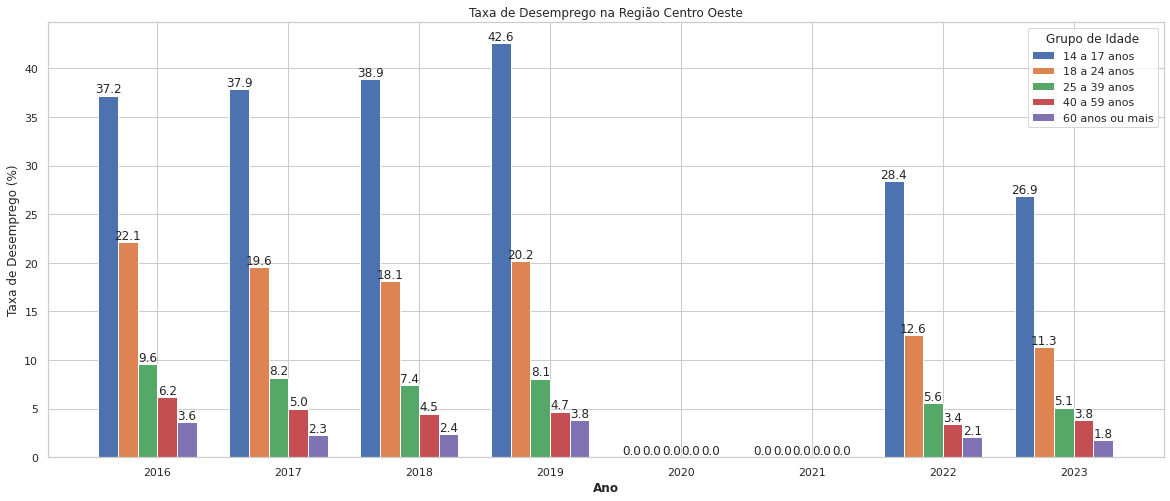

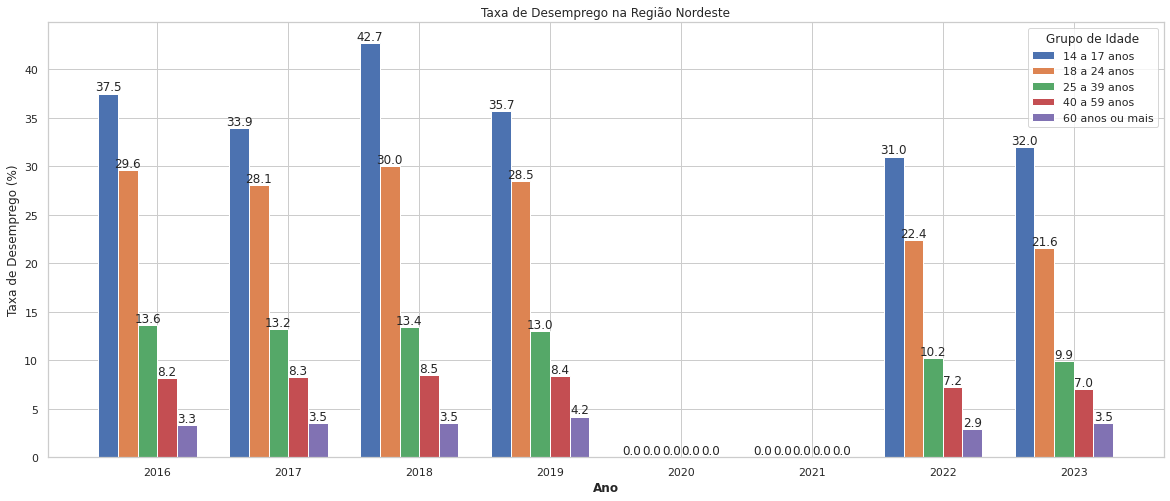

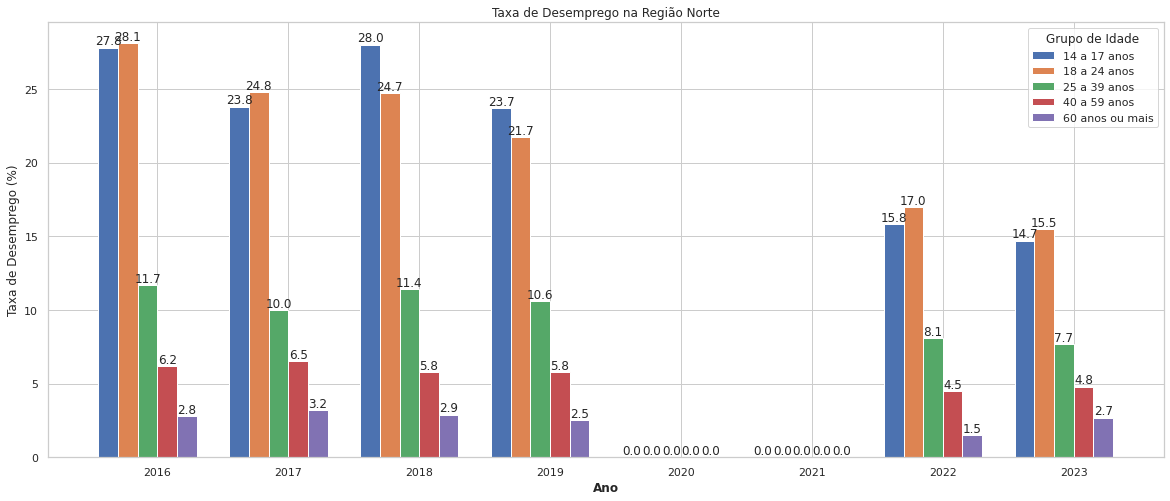

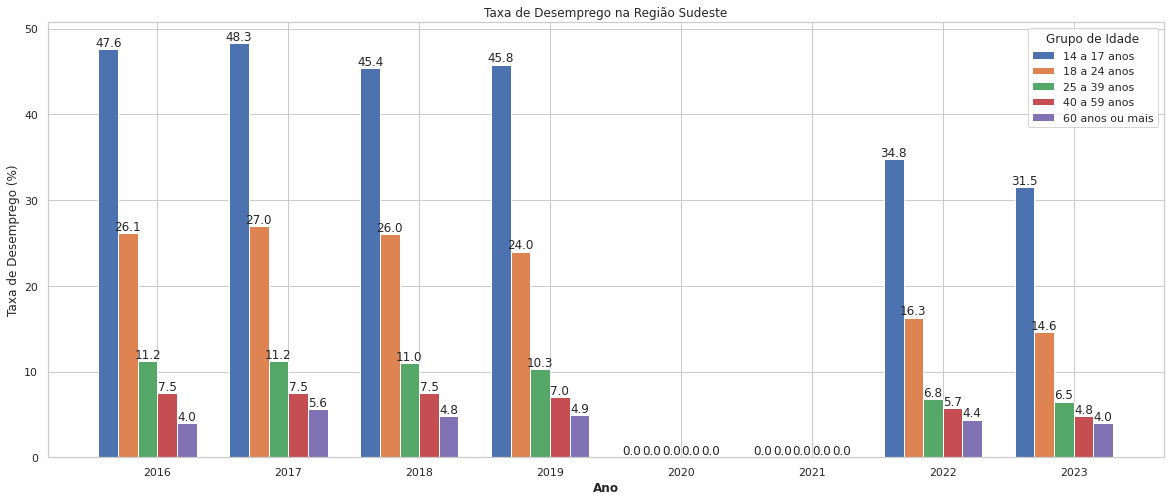

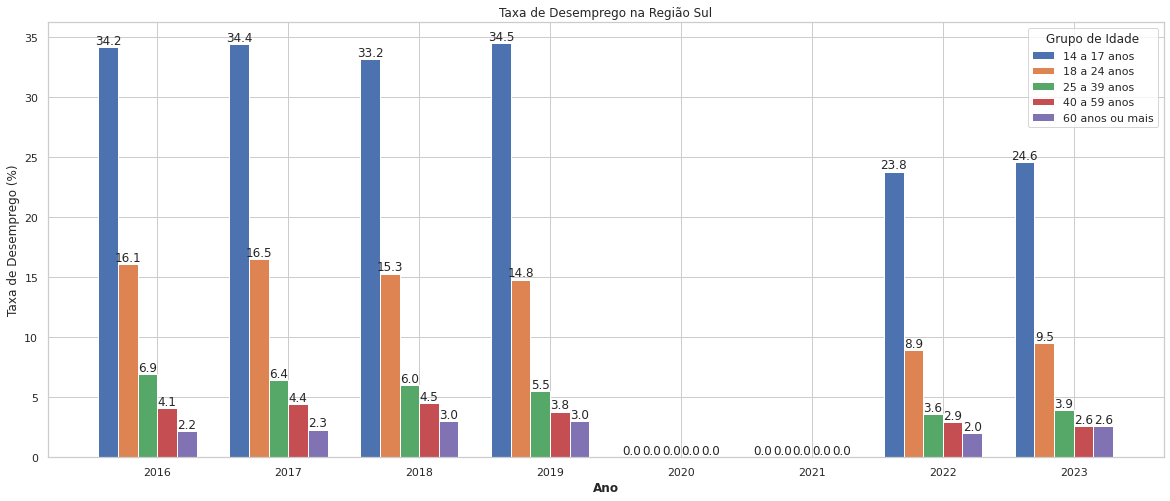

In [0]:
# Criando seção Spark
spark = SparkSession.builder.appName("AnaliseDesemprego").getOrCreate()

# Obtendo dados de desemprego
regioes = ["Centro Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]
resultado = {}

for regiao in regioes:
    query = (
        "SELECT P.Ano, D.Taxa_Desemprego, D.Grupo_de_Idade "
        + "FROM Desemprego D "
        + "JOIN Regiao R ON D.ID_Regiao = R.ID_Regiao "
        + "JOIN Periodo P ON D.ID_Periodo = P.ID_Periodo "
        + f"WHERE R.Regiao = '{regiao}' AND P.Ano >= 2016 AND P.Trimestre = 4"
    )
    data = spark.sql(query).collect()
    list_data = [(row['Ano'], row['Taxa_Desemprego'], row['Grupo_de_Idade']) for row in data]
    resultado[regiao] = list_data

# Gerando o gráfico
anos = sorted(list(set(row[0] for regiao in resultado for row in resultado[regiao])))
grupos_idade = sorted(list(set(row[2] for regiao in resultado for row in resultado[regiao])))

# Preparando os dados para plotagem
for regiao in regioes:
    dados_plotagem = {grupo: {ano: 0 for ano in anos} for grupo in grupos_idade}
    
    for ano, taxa, grupo in resultado[regiao]:
        dados_plotagem[grupo][ano] = taxa
    
    dados_final = {grupo: [dados_plotagem[grupo][ano] for ano in anos] for grupo in grupos_idade}
    
    # Definindo a largura das barras
    bar_width = 0.15
    num_grupos = len(grupos_idade)
    indices = np.arange(len(anos))
    
    # Plotando os gráficos de barras
    plt.figure(figsize=(20, 8))
    for i, grupo in enumerate(grupos_idade):
        bars = plt.bar(indices + i * bar_width, dados_final[grupo], width=bar_width, label=f'{grupo}')
        
        # Adicionando os valores das taxas acima das barras
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}',
                ha='center',
                va='bottom'
            )
    
    # Adicionando os nomes dos anos no eixo x
    plt.xlabel('Ano', fontweight='bold')
    plt.xticks(indices + bar_width * (num_grupos / 2), anos)
    plt.ylabel('Taxa de Desemprego (%)')
    plt.title(f'Taxa de Desemprego na Região {regiao}')
    plt.legend(title='Grupo de Idade')
    
    # Mostrando o gráfico
    plt.show()


Como podemos observar nas imagens acima, foram construídos 5 gráficos, um para cada região do Brasil, demonstrando a evolução do percentual de desemprego por grupo de idade no Brasil, desde o ano de 2016. Vale ressaltar que devido a pandemia de covid 19, não há dados para os anos de 2020 e 2021.

Além disso, o período analisado foi sempre referente ao último trimestre do ano, com o intuito de que o resultado fosse avaliado como o final do ano.

Nos tópicos a seguir, serão discutidos os resultados individuais e comentários gerais obtidos através da análise gráfica dos dados.

**Resultado por região**:
 - **Centro Oeste**: 
   - **14 a 17 anos**: Grupo com maior taxa de desemprego que apresentou um aumento do percentual entre os anos de 2016 e 2019, chegando a atingir o patamar de 42.6% em 2019. No entanto, foi verificado uma queda dessa taxa após esse período, reduzindo o percentual para 26.9% no ano de 2023.
   - **18 a 24 anos**: Segundo grupo com maior taxa de desemprego, que apresentou entre os de 2016 a 2019 um percentual oscilando entre 18% e 22%. No entanto, foi verificado uma redução significativa desse valor para apenas 11.3% no ano de 2023.
   - **25 a 39 anos**: Grupo que apresentou um percentual oscilando entre 8.1% e 9.6% entre os anos de 2016 e 2019 e um redução para apenas 5.1% no ano de 2023.
   - **40 a 59 anos**: Grupo que também apresentou uma redução da taxa de desemprego de 6.2% para 3.8% entre os anos de 2016 e 2023.
   - **60 anos ou mais**: Grupo com menor taxa de desemprego que apresentou uma oscilação baixa no período analisado, no entanto, que atingiu seu valor mínimo de apenas 1.8%, no ano de 2023.
 - **Nordeste**:
   - **14 a 17 anos**: Grupo de maior representatividade que atingiu a maior taxa de desemprego no ano de 2018, com um valor de 42.7%. No entanto, esse percentual apresentou redução nos próximos anos, atigindo o seu menor valor no ano 2022, com uma taxa de 31%.
   - **18 a 24 anos**: Segundo grupo de maior representatividade que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 28% e 30%. No entanto, atingiu seu menor valor no ano de 2023, com uma taxa de 21.6%.
   - **25 a 39 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores em torno de 13%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 9.9%, no ano de 2023.
   - **40 a 59 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores em torno de 8%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 7%, no ano de 2023.
   - **60 anos ou mais**: Grupo com menor taxa de desemprego que apresentou oscilação muito baixa no período analisado. No entanto, vale ressaltar que o valor verificado apresentou um pequeno aumento percentual de 3.3% para 3.5%, entre os anos 2016 e 2023.
 - **Norte**:
   - **14 a 17 anos**: Foi o grupo de maior representatividade no ano de 2018, registrando uma taxa de desemprego de 28%. No entanto, essa taxa apresentou redução nos anos seguintes, chegando a atingir 14.7% no ano de 2023.
   - **18 a 24 anos**: Durante o período analisado, foi o grupo que apresentou maiores taxas de desemprego, com exceção do ano de 2018. Em termos de valores percentuais, as taxas apresentaram redução em todos os anos, saindo de um valor de 28.1%, em 2016, para 15.5%, em 2023.
   - **25 a 39 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 10% e 12%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 7.7%, no ano de 2023.
   - **40 a 59 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 5% e 7%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 4.5%, no ano de 2022.
   - **60 anos ou mais**: Grupo com menor taxa de desemprego que apresentou oscilação muito baixa no período analisado. No entanto, vale ressaltar que o valor verificado apresentou uma pequena redução percentual de 2.8% para 2.7%, entre os anos 2016 e 2023.
 - **Sudeste**:
   - **14 a 17 anos**: Grupo de maior representatividade durante o período analisado, apresentando uma baixa oscilação entre os anos de 2016 e 2019, com valores entre 48% e 45%. No entanto, nos próximos anos, foi constado uma redução da taxa, chegando a atingir o valor de 31.5% no ano de 2023.
   - **18 a 24 anos**: Segundo grupo de maior representatividade que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 24% e 28%. No entanto, atingiu seu menor valor no ano de 2023, com uma taxa de 14.6%.
   - **25 a 39 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 10% e 11%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 6.5%, no ano de 2023.
   - **40 a 59 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores em torno de 7%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 4.8%, no ano de 2023.
   - **60 anos ou mais**: Grupo com menor taxa de desemprego que apresentou uma oscilação baixa no período analisado. Vale ressaltar que tanto no ano de 2016 como 2023, o valor percentual relatado foi o mesmo de apenas 4%.
 - **Sul**:
   - **14 a 17 anos**: Grupo de maior representatividade durante o período analisado, apresentando uma baixa oscilação entre os anos de 2016 e 2019, com valores entre 33% e 34%. No entanto, nos próximos anos, foi constado uma redução da taxa, chegando a atingir o valor de 23.8% no ano de 2022.
   - **18 a 24 anos**: Segundo grupo de maior representatividade que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 14% e 16%. No entanto, atingiu seu menor valor no ano de 2022, com uma taxa de 8.9%.
   - **25 a 39 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores entre 5% e 7%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 3.6%, no ano de 2022.
   - **40 a 59 anos**: Grupo que apresentou baixa oscilação de percentual entre os anos de 2016 e 2019, apresentando valores em torno de 4%. No entanto, foi verificado uma redução nos anos seguintes, chegando a seu valor mínimo de 2.6%, no ano de 2023.
   - **60 anos ou mais**: Grupo com menor taxa de desemprego que apresentou oscilação muito baixa no período analisado. No entanto, vale ressaltar que o valor verificado apresentou um pequeno aumento percentual de 2.2% para 2.6%, entre os anos 2016 e 2023.

**Comentários Gerais**:

  De forma geral, pode-se concluir que em todas as regiões, os grupos de pessoas mais jovens (14 a 17 anos | 18 a 24 anos) são os que apresentam maiores taxas de desemprego durante o período analisado. Além disso, idosos pertecentes ao grupo de 60 anos ou mais apresentaram o menor percentual de desemprego. 

#### Comportamento do Índice de Analfabetismo em Adultos

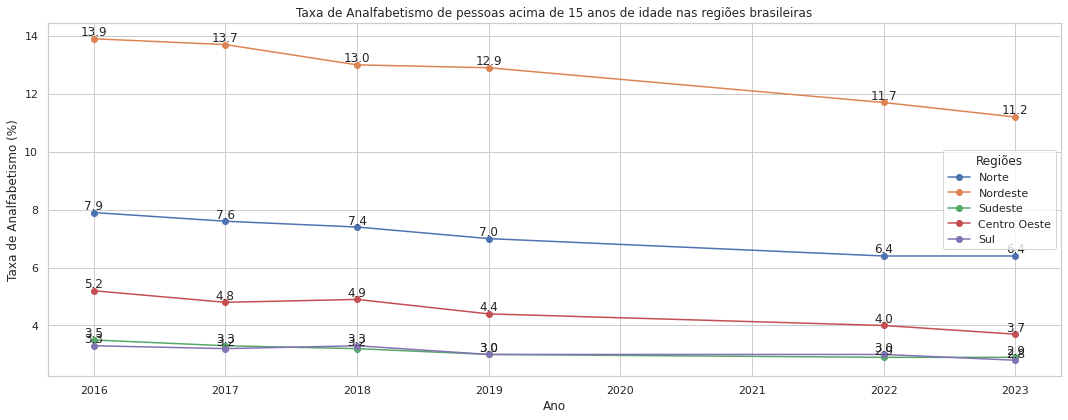

In [0]:
# Criando seção Spark
spark = SparkSession.builder.appName("AnaliseAnalfabetismo").getOrCreate()

query = """
SELECT P.Ano, R.Regiao, A.Taxa_Analfabetismo
FROM Analfabetismo A
JOIN Regiao R ON A.ID_Regiao = R.ID_Regiao
JOIN Periodo P ON A.ID_Periodo = P.ID_Periodo 
GROUP BY P.Ano, R.Regiao, A.Taxa_Analfabetismo
ORDER BY P.Ano
"""
resultado = spark.sql(query).collect()
data = [(row['Ano'], row['Taxa_Analfabetismo'], row['Regiao']) for row in resultado]

# Organizando os dados por região
regioes = {}
for ano, taxa, regiao in data:
    if regiao not in regioes:
        regioes[regiao] = {'anos': [], 'taxas': []}

    regioes[regiao]['anos'].append(ano)
    regioes[regiao]['taxas'].append(taxa)

# Plotando o gráfico de linha
plt.figure(figsize=(15, 6))

for regiao, valores in regioes.items():
    plt.plot(valores['anos'], valores['taxas'], marker='o', label=regiao)
    
    # Adicionando os valores das taxas nas linhas
    for ano, taxa in zip(valores['anos'], valores['taxas']):
        plt.text(ano, taxa, f'{taxa:.1f}', ha='center', va='bottom')

# Adicionando título e rótulos
plt.title('Taxa de Analfabetismo de pessoas acima de 15 anos de idade nas regiões brasileiras')
plt.xlabel('Ano')
plt.ylabel('Taxa de Analfabetismo (%)')

# Adicionando a legenda
plt.legend(title='Regiões')

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


Como podemos observar na imagem acima, foram plotados gráficos de linha para cada região do Brasil com os índices de analfabetismo em pessoas acima de 15 anos, entre os anos de 2016 e 2023. Vale ressaltar que devido a pandemia de covid 19, não há dados para os anos de 2020 e 2021.

De forma geral, podemos constatar que em todas as regiões, houve uma redução de percentual da taxa demonstrando que o número de pessoas analfabetas tem diminuído ao longo dos anos.

Considerado o ano de 2023 como o último ano de referência, podemos chegar ao seguinte ranking de analfabetismo das regiões brasileiras:
  - **1**: Nordeste.
  - **2**: Norte.
  - **3**: Centro Oeste.
  - **4**: Sudeste.
  - **5**: Sul.

#### Comportamento do Índice de Escolarização em Menores de Idade

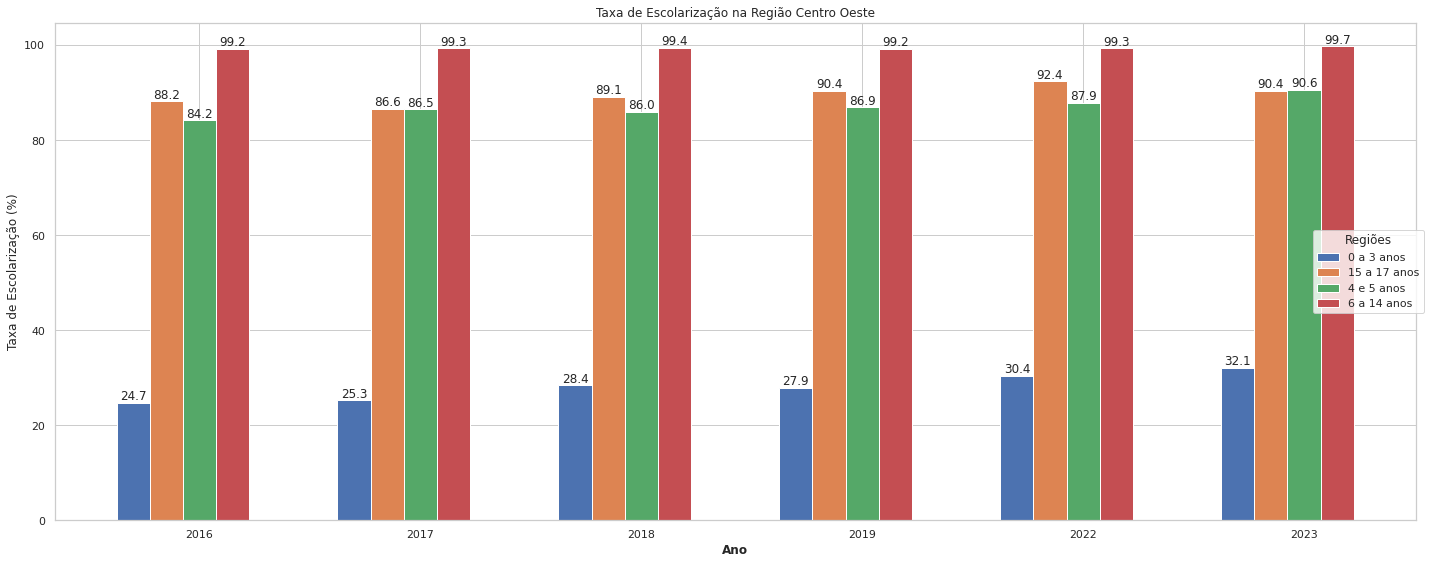

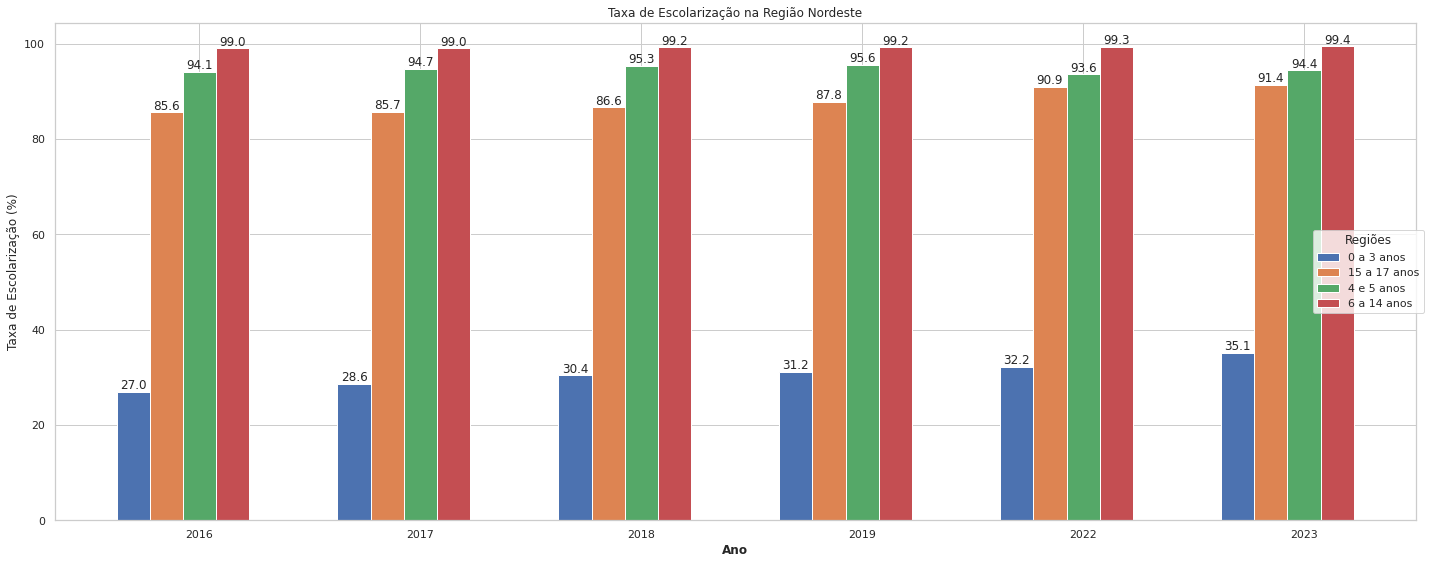

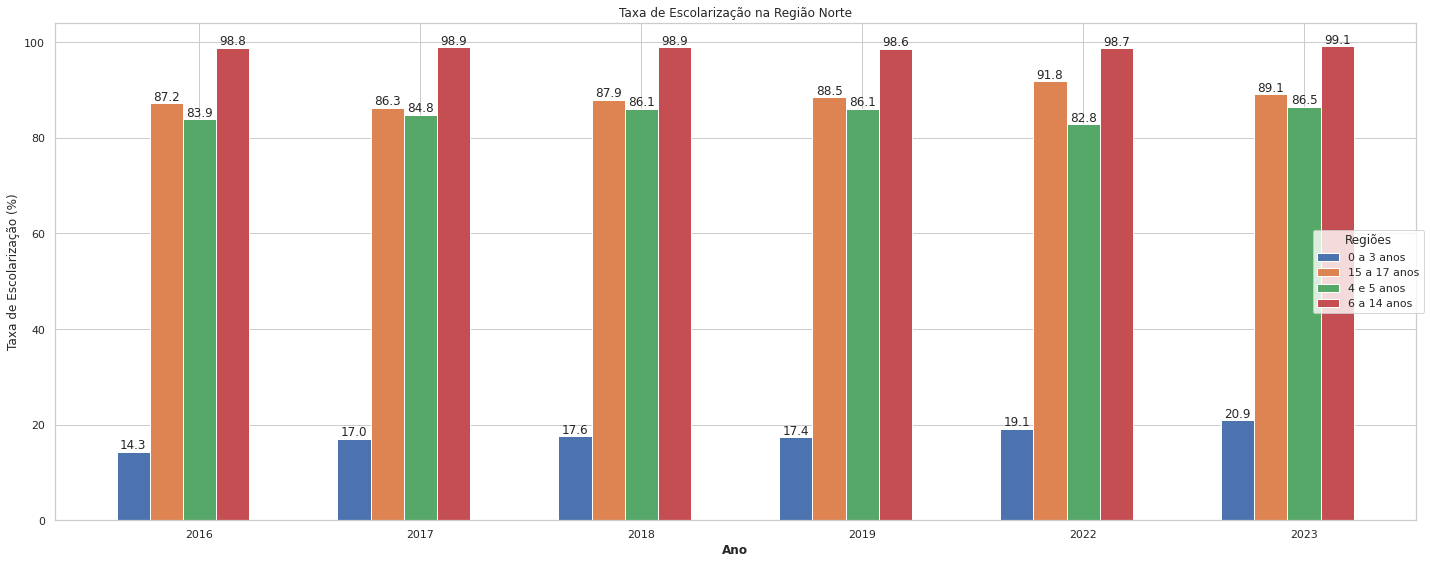

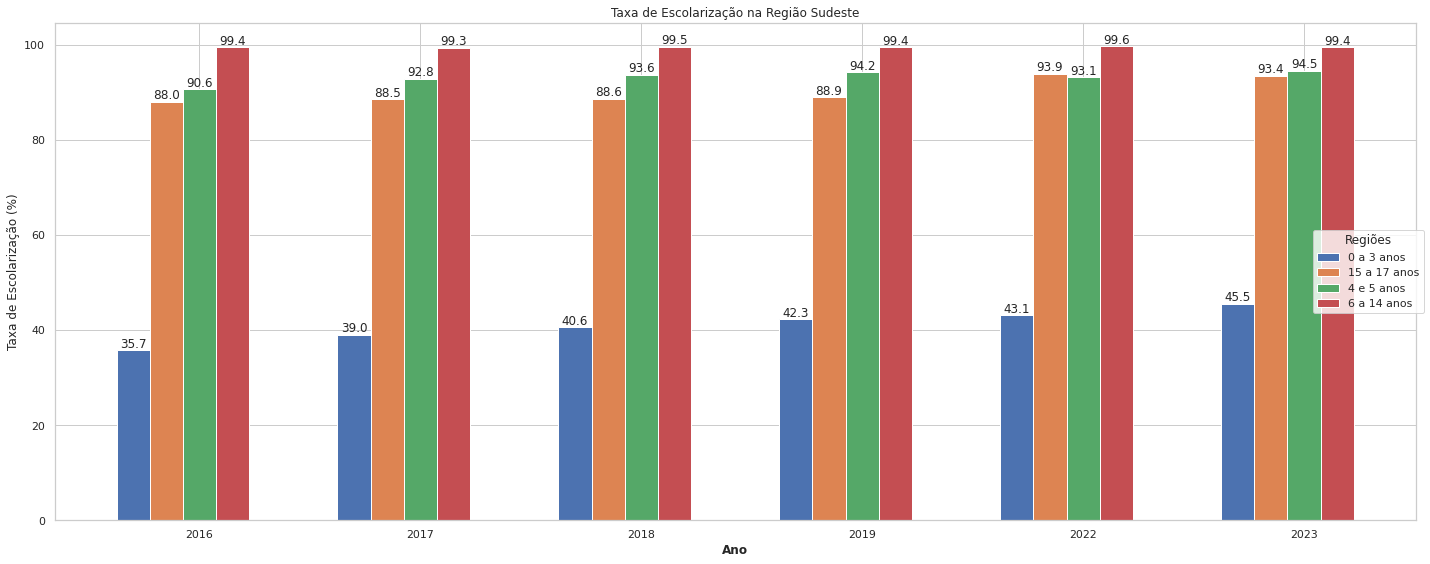

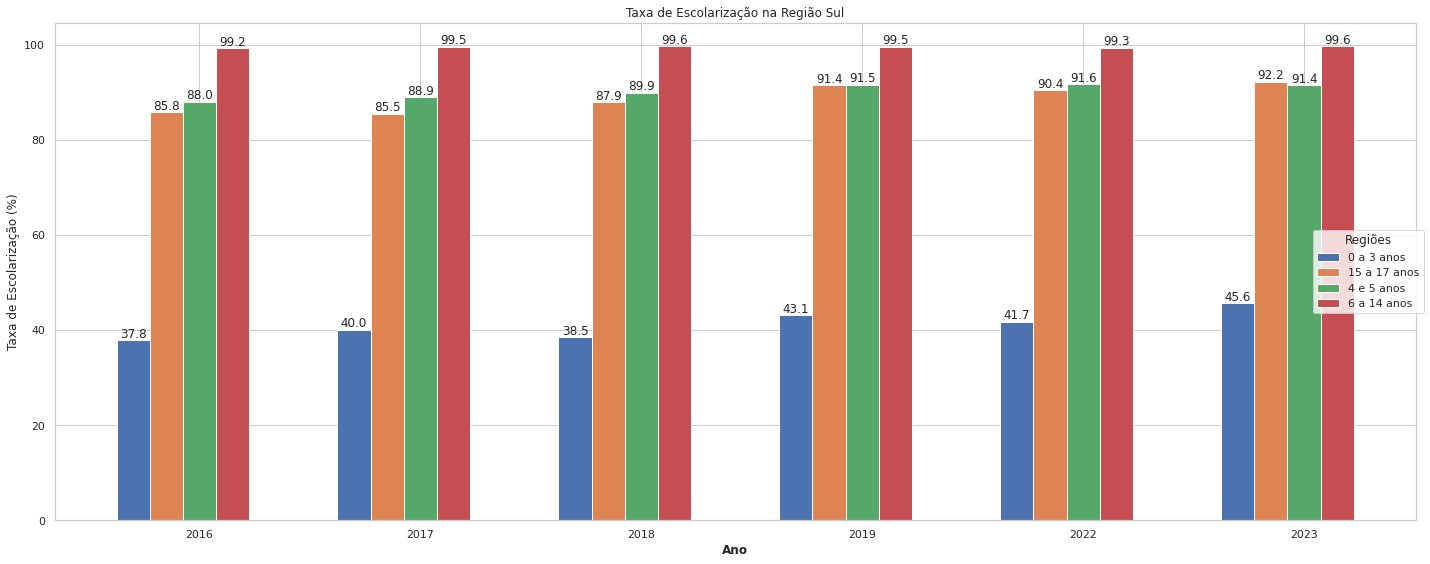

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession

# Criando seção Spark
spark = SparkSession.builder.appName("AnaliseDesemprego").getOrCreate()

# Obtendo dados de escolarização
regioes = ["Centro Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]
resultado = {}

for regiao in regioes:
    query = (
        "SELECT P.Ano, E.Taxa_Escolarizacao, E.Grupo_de_Idade "
        + "FROM Escolarizacao E "
        + "JOIN Regiao R ON E.ID_Regiao = R.ID_Regiao "
        + "JOIN Periodo P ON E.ID_Periodo = P.ID_Periodo "
        + f"WHERE R.Regiao = '{regiao}'"
    )
    data = spark.sql(query).collect()
    list_data = [(row['Ano'], row['Taxa_Escolarizacao'], row['Grupo_de_Idade']) for row in data]
    resultado[regiao] = list_data

# Gerando o gráfico
anos = sorted(list(set(row[0] for regiao in resultado for row in resultado[regiao])))
grupos_idade = sorted(list(set(row[2] for regiao in resultado for row in resultado[regiao])))

# Preparando os dados para plotagem
for regiao in regioes:
    dados_plotagem = {grupo: {ano: 0 for ano in anos} for grupo in grupos_idade}
    
    for ano, taxa, grupo in resultado[regiao]:
        dados_plotagem[grupo][ano] = taxa
    
    dados_final = {grupo: [dados_plotagem[grupo][ano] for ano in anos] for grupo in grupos_idade}
    
    # Definindo a largura das barras
    bar_width = 0.15
    num_grupos = len(grupos_idade)
    indices = np.arange(len(anos))
    
    # Plotando os gráficos de barras
    plt.figure(figsize=(15, 8))
    for i, grupo in enumerate(grupos_idade):
        bars = plt.bar(indices + i * bar_width, dados_final[grupo], width=bar_width, label=f'{grupo}')
        
        # Adicionando os valores das taxas acima das barras
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}',
                ha='center',
                va='bottom'
            )
    
    # Adicionando os nomes dos anos no eixo x
    plt.xlabel('Ano', fontweight='bold')
    plt.xticks(indices + bar_width * (num_grupos / 2), anos)
    plt.ylabel('Taxa de Escolarização (%)')
    plt.title(f'Taxa de Escolarização na Região {regiao}')
    
    # Posicionando a legenda fora do gráfico
    plt.legend(title='Regiões', bbox_to_anchor=(1.01, 0.5), loc='center right')
    
    # Mostrando o gráfico
    plt.tight_layout()
    plt.show()


Como podemos observar nas imagens acima, foram construídos 5 gráficos, um para cada região do Brasil, demonstrando a evolução do percentual de escolarização por grupo de idade no Brasil, desde o ano de 2016. Vale ressaltar que devido a pandemia de covid 19, não há dados para os anos de 2020 e 2021.

Nos tópicos a seguir, serão discutidos os resultados individuais e comentários gerais obtidos através da análise gráfica dos dados.

**Resultado por região**:
 - **Centro Oeste**: 
   - **0 a 3 anos**: Grupo de menor representatividade, que apresentou uma aumento percentual gradual ao longo dos anos, saindo de uma taxa de 24.7%, em 2016, para 32.1%, em 2023.
   - **4 e 5 anos**: Grupo que apresentou um baixa oscilação percentual entre o período analisado, no entanto, também obteve um aumento de taxa de 84.2%, em 2016, para 90.6%, em 2023.
   - **6 a 14 anos**: Grupo que apresentou maior representatividade ao longo dos anos e um percentual que oscilou em torno de 99%. Vale ressaltar que a taxa apresentou um pequeno aumento saindo de 99.2%, em 2016, para 99.7%, em 2023.
   - **15 a 17 anos**: Grupo que apresentou valores oscilando em torno de 86% a 90%, tendo seu valor máximo registrado no ano de 2022, com uma taxa de 92.4%.
 - **Nordeste**:
   - **0 a 3 anos**: Grupo de menor representatividade, que apresentou uma aumento percentual gradual ao longo dos anos, saindo de uma taxa de 27%, em 2016, para 35.1%, em 2023.
   - **4 e 5 anos**: Grupo que apresentou baixa oscilação percentual ao longo dos anos, tendo seu valor máximo registrado no ano de 2019, com uma taxa de 95.6%.
   - **6 a 14 anos**: Grupo que apresentou maior representatividade ao longo dos anos e um percentual que oscilou em torno de 99%. Vale ressaltar que a taxa apresentou um pequeno aumento saindo de 99%, em 2016, para 99.4%, em 2023.
   - **15 a 17 anos**: Grupo que apresentou uma evolução da taxa ao longo do período analisado, saindo de um valor de 85.6%, em 2016, para 91.4%, em 2023.
 - **Norte**:
   - **0 a 3 anos**: Grupo de menor representatividade, que apresentou uma aumento percentual gradual ao longo dos anos, saindo de uma taxa de 14.3%, em 2016, para 20.9%, em 2023.
   - **4 e 5 anos**: Grupo que apresentou baixa oscilação percentual ao longo dos anos, tendo seu valor máximo registrado no ano de 2023, com uma taxa de 86.5%.
   - **6 a 14 anos**: Grupo que apresentou maior representatividade ao longo dos anos e um percentual que oscilou em torno de 99%. Vale ressaltar que a taxa apresentou um pequeno aumento saindo de 98.8%, em 2016, para 99.1%, em 2023.
   - **15 a 17 anos**: Grupo que teve uma baixa oscilação percentual ao longo dos anos, tendo seu valor máximo registrado no ano de 2022, com uma taxa de 91.8%.
 - **Sudeste**:
   - **0 a 3 anos**: Grupo de menor representatividade, que apresentou uma aumento percentual gradual ao longo dos anos, saindo de uma taxa de 35.7%, em 2016, para 45.5%, em 2023.
   - **4 e 5 anos**: Grupo que apresentou baixa oscilação percentual ao longo dos anos, tendo seu valor máximo registrado no ano de 2023, com uma taxa de 94.5%.
   - **6 a 14 anos**: Grupo que apresentou maior representatividade ao longo dos anos e um percentual que oscilou em torno de 99%. Vale ressaltar que a taxa apresentou seu valor máximo no ano de 2022, com uma taxa de 99.6%.
   - **15 a 17 anos**: Grupo que apresento uma evolução ao longo dos anos, saindo de um valor de 88%, em 2016, para 93.4%, em 2023.
 - **Sul**:
   - **0 a 3 anos**: Grupo de menor representatividade, que apresentou uma aumento percentual gradual ao longo dos anos, saindo de uma taxa de 37.8%, em 2016, para 45.6%, em 2023.
   - **4 e 5 anos**: Grupo que apresentou baixa oscilação percentual ao longo dos anos, tendo seu valor máximo registrado no ano de 2022, com uma taxa de 91.6%.
   - **6 a 14 anos**: Grupo que apresentou maior representatividade ao longo dos anos e um percentual que oscilou em torno de 99%. Vale ressaltar que a taxa apresentou seu valor máximo nos anos de 2018 e 2023, com uma taxa de 99.6%.
   - **15 a 17 anos**: Grupo que apresento uma evolução ao longo dos anos, saindo de um valor de 88%, em 2016, para 91.4%, em 2023.

**Comentários Gerais**:

  De forma geral, podemos concluir que em todas as regiões, as crianças de 0 a 3 anos são as menos escolarizadas. Além disso, é possível observar que a medida que as crianças vão envelhecendo, mais escolarizadas tendem a ser, principalmente quando estão na idade de 6 a 14 anos. No entanto, quando ficam mais velhas, pertecendo ao grupo de 15 a 17 anos, é possível perceber que a taxa de crianças escolarizadas volta a diminuir um pouco quando comparadas com o grupo anterior de 6 a 14 anos.

#### Relação entre Índice de Desemprego e Índice de Analfabetismo em Adultos

Ao comparar o gráfico de índice de analfabetismo em pessoas acima de 15 anos com os gráficos de taxa de desemprego nas cinco regiões brasileiras, é possível observar que:

- De forma geral, tanto a taxa de desemprego quanto a de analfabetismo apresentaram reduções durante o período analisado. Isso pode indicar que, com um percentual menor de pessoas analfabetas, as chances de conseguir um emprego aumentam.

#### Relação entre Índice de Analfabetismo em Adultos e Índice de Escolarização em Menores de Idade


Ao comparar o gráfico de índice de analfabetismo em pessoas acima de 15 anos com os gráficos de taxa de escolarização nas cinco regiões brasileiras, é possível observar que:

- As regiões Sul e Sudeste apresentam os menores índices de analfabetismo. Em contrapartida, ao analisar os índices de escolarização, nota-se que nessas duas regiões a taxa de escolarização entre pessoas de 15 a 17 anos é a maior. Isso pode indicar que quanto maior o nível de escolarização nessa faixa etária, menores são as chances de essas pessoas serem analfabetas aos 15 anos ou mais.
- As regiões Centro-Oeste, Nordeste e Norte possuem os maiores índices de analfabetismo. Ao observar os índices de escolarização, percebe-se que nessas três regiões a taxa de escolarização entre crianças de 0 a 3 anos é menor. Isso pode indicar que quanto menor a escolarização nessa faixa etária, maiores são as chances de essas pessoas serem analfabetas aos 15 anos ou mais.

## Autoavaliação

Finalizado o trabalho, acredito que o estudo proposto conseguiu atingir os objetivos iniciais, pois foi possível explorar cada tópico mencionado. Primeiramente, fizemos uma análise individual de cada tema – Desemprego, Analfabetismo e Escolarização – e, posteriormente, observamos comportamentos comuns entre eles.

Além disso, ao longo do trabalho, todos os dados foram coletados, tratados, modelados e carregados nas tabelas criadas, garantindo a qualidade necessária para a elaboração de gráficos. Esses gráficos foram utilizados para acompanhar a evolução percentual de cada um dos índices explorados entre os anos de 2016 e 2023, tornando o estudo mais assertivo e de fácil interpretação.